#### _Speech Processing: TTS_

In [1]:
# run this first
import matplotlib.pyplot as plt
import numpy as np
import math
import IPython

# 1 Entropy


### Learning Outcomes
* Understand that entropy measures uncertainty
* Gain some intutitions about how entropy behaves
* See that entropy can be reduced by splitting a data set into two partitions

### Need to know
* Topic Videos: Decision tree, Learning decision trees

Our goal in this sequence of notebooks is to understand how a classification tree is learned from data. 

Each split of the data in a decision tree decreases uncertainty about the value of the predictee: we become more and more certain of its value as we descend the tree. We can measure the amount of uncertainty using entropy.


## 1.1 How entropy is calculated

Consider a categorical variable with M possible values, or *classes*.

Entropy is defined as

$$ \Large H = - \sum_{i=1}^{M} p_i log_2(p_i) $$

where the $p_i$ are the probabilities of each of the $M$ classes. $H$ is the entropy in **bits**. It is a measure of uncertainty. Higher entropy means "more unpredictable / higher uncertainty". Lower entropy means "more predictable / more certainty". 

To help you inderstand the equation, here's a short video

In [2]:
from IPython.display import HTML
IPython.display.IFrame(width="640",height="428",src="https://fast.wistia.net/embed/iframe/utpd6km04m")

and here's a Python function to compute entropy from an array of counts, or probabilities. (It works for either case.)

In [3]:
def entropy(counts):
    """ accepts an array of counts or probabilities and computes -1 * sum {p * log p}"""
    H=0 # entropy
    total_count=float(sum(counts))
    for c in counts:
        if c > 0: # cannot take log of zero
            p=float(c)/total_count
            H=H + p * math.log2(p)
    H=H*-1.0
    return H # in bits, because log was base 2

## 1.2 Get an intuitive understanding of entropy

To help you visualise probability distributions, here's a function for plotting one. It also computes the entropy of the distribution.

In [4]:
def plot_distribution(labels,counts,title='Distribution'):
    if sum(counts) == 0:
        print("Cannot handle this case!")
        return 0
    total_count=float(sum(counts))
    pdf = [c / total_count for c in counts]
    x_pos = [i for i, _ in enumerate(labels)]
    plt.bar(x_pos, pdf, color='blue')
    plt.title(title+" (entropy={:.3} bits)".format(entropy(counts)))
    plt.xlabel("label")
    plt.ylabel("probability")
    plt.xticks(x_pos, labels)
    plt.show()

### 1.2.1 What entropy measures about a probability distribution

Now find out by experimentation what the **highest and lowest values of entropy** are. The variable (which will be called the predictee when we build a Decision Tree) here is "Fruit" and it has two possible values (= classes) of "Apple" and "Orange". You are going to directly manipulate the count of each class in the code and see what the effect on the entropy is.

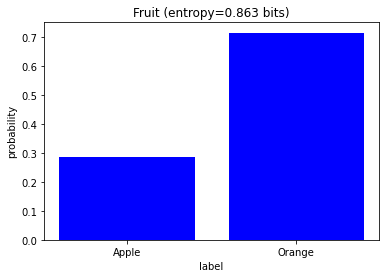

In [5]:
# the labels of the two classes (i.e, the values the categorical random variable "Fruit" can take)
labels = ['Apple', 'Orange']

# the number of examples of each class in our data set
counts = [4, 10] # <- play with the distribution of counts

plot_distribution(labels,counts,"Fruit")


### 1.2.2 Try different numbers of classes
What is the relationship between the number of classes and the **highest value of entropy** you can acheive?
(Hint: try with 2, 4, and 8 classes, as well as other numbers.)

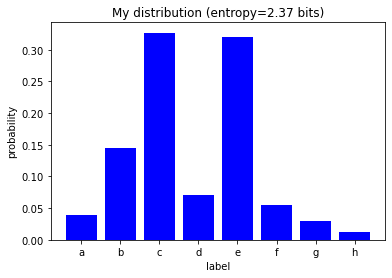

In [6]:
# add and remove classes to change how many there are
labels = ['k', 's', 'ʃ', 'tʃ']

# the number of counts must match the number of classes
counts = [11180, 2185, 1170, 2005] # <- play with the distribution of counts

# for example, how about a distribution over 5 classes
labels = ['a', 'b', 'c', 'd', 'e']
counts = [12,   45, 101,  22,  99] # <- play with the distribution of counts

# or over 8 classes (or any other number - please experiment!)
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
counts = [12,   45, 101,  22,  99,  17,   9,  4 ] # <- play with the distribution of counts

plot_distribution(labels,counts,"My distribution")

Now go back to the equation and relate what you have found by experimentation to the terms in the equation. Where in the equation is the number of classes that you just varied? Where in the equation is the probability distribution over those classes?

## 1.3 Reduce entropy

From your experiments above you should have learned that a uniform distribution has maximum entropy, and anything you do to make it more uneven will reduce entropy. The limit is reached when only one class has a non-zero count: then the entropy is zero.

Our decision tree will be trying to reduce entropy. It seems that the way to do that is to make the probability distribution less uniform (more 'uneven').

So, how can we make a probability distribution less uniform? Your next task is to take a distribution and split it into two distributions that have lower entropy. Try different ways to split the ditribution. How much can you reduce the entropy? Is it ever possible to *increase* the entropy?

Here's the original distribution, over 4 classes:

The distribution before the split was [11180  2185  1170  2005]
and the entropy of that distribution is 1.41 bits


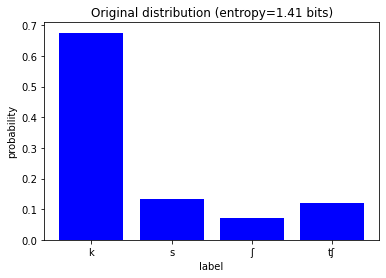

In [7]:
labels = ['k', 's', 'ʃ', 'tʃ'] # do not change this
counts = np.array([11180, 2185, 1170, 2005]) # do not change this

print("The distribution before the split was",counts)
print("and the entropy of that distribution is {:.3} bits".format(entropy(counts)))
plot_distribution(labels,counts,"Original distribution")

Now we split the above counts into two partitions. We'll call then 'left' and 'right' because we're eventually going to build a decision tree (not yet though!).

The two distributions after the split are [  46 1339   12  104] and [11134   846  1158  1901]
Entropies of the two distributions are 0.624 bits and 1.22 bits.
Total entropy of the two distributions is 1.16 bits 
which is a reduction of 0.244 bits compared to the original distribution.


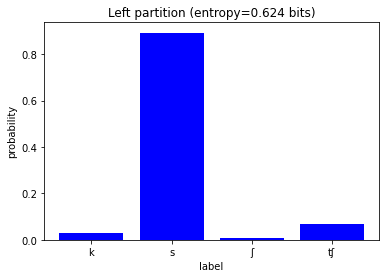

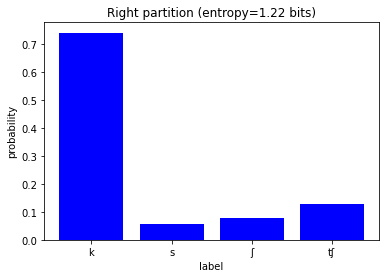

In [8]:
# play around with these values (they can't be larger than the original counts above though)
left_counts = np.array([46, 1339, 12, 104])

right_counts = np.subtract(counts,left_counts) # this is the remaining data; do not change this line

print("The two distributions after the split are",left_counts,"and",right_counts)
print("Entropies of the two distributions are {:.3} bits and {:.3} bits.".format(entropy(left_counts),entropy(right_counts)))

# the total entropy after splitting is simply a weighted sum of the two entropies
total_entropy = ( sum(left_counts)*entropy(left_counts) + sum(right_counts)*entropy(right_counts) ) / (sum(left_counts) + sum(right_counts))
print("Total entropy of the two distributions is {:.3} bits ".format(total_entropy))
print("which is a reduction of {:.3} bits compared to the original distribution.".format(entropy(counts)-total_entropy))

plot_distribution(labels,left_counts,"Left partition")
plot_distribution(labels,right_counts,"Right partition")

## Summary

You should now understand how entropy behaves. As we make a probability distribution more and more predictable, entropy reduces. This will be the goal of our decision tree: to reduce uncertainty about the value of the predictee.

In this notebook, when you split a distribution into two partitions, you should have been able to acheive large reductions in entropy, like in the "ideal Decision Tree" in the topic video [Learning Decision Trees](https://speech.zone/courses/speech-processing/module-5-speech-synthesis/).

When we build our decision tree, we can only make splits based on questions about the *predictors*. This is because, at inference time, that is all we will know.

We'll do that in the next notebook.